In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
import sys
sys.path.append('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/utils')
from pp_utils import *
from plot_utils import *
from mTRF_utils import *
from midi_utils import *
from update_sub_lists import*
from ERP_utils import *

In [20]:
keystroke_file = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mapchange_csv_corrected/mapchange_keystrokes_post_08.csv'

In [21]:
def generate_sv_onset(file):
    """ 
    Generates a support vector for mTRF analyses
    """
    data = pd.read_csv(file)
    ktimes = data['time']
    sv = np.zeros(76800) #length of the 10min file at 128 hz
    sv[ktimes] = 1

    return sv

def generate_sv_firsts(file, other_value):
    """ 
    Support vector where the firsts keystrokes are 1 and the others are some other value. 
    other_value: value of the other keystrokes
    """
    
    data = pd.read_csv(file)

    ftimes = data[data['type'] == 'first']['time']
    otimes = data[data['type'] == 'other']['time']

    sv = np.zeros(76800) #length of the 10min file at 128 hz
    
    sv[ftimes] = 1
    sv[otimes] = other_value

    return sv


In [22]:

good_listen_subjects, good_motor_subjects,good_error_subjects,musicians,nonmusicians = load_subject_lists_LME()
subjects_to_process = good_error_subjects


In [30]:
sv_path = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mtrf_error_surprise/sv'
keystroke_path = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mapchange_csv_corrected'

periods = ['pre', 'post']

for sub in subjects_to_process:
    for period in periods:
        keystroke_file = os.path.join(keystroke_path, f'mapchange_keystrokes_{period}_{sub}.csv')

        sv = generate_sv_onset(keystroke_file)
        fsv = generate_sv_firsts(keystroke_file, 0.7)
        sv_data = {
            'onsets':sv,
            'firsts': fsv
        }

        savemat(f"{sv_path}/sv_data_{period}_{sub}.mat", sv_data)


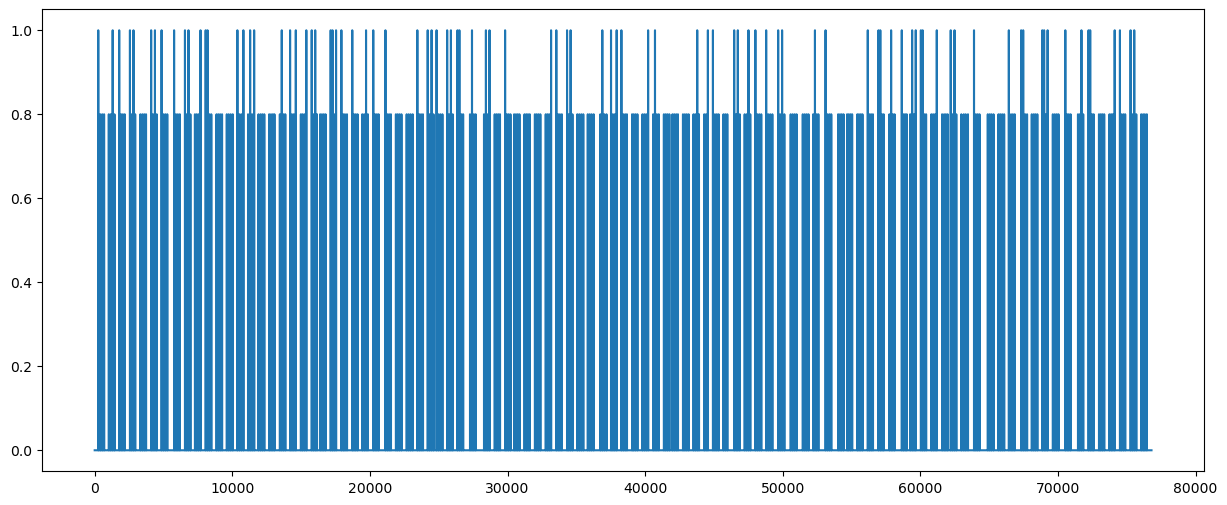

In [18]:
fsv = loadmat('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mtrf_error_surprise/sv/sv_data_post_01.mat')['firsts'][0]

plt.figure(figsize = (15,6))
plt.plot(fsv)
#plt.xlim(0,10000)